# Import

1. Lot Area
2. Lot Frontage
3. Street
4. 

In [303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV

# Load train data

In [278]:
train = pd.read_csv('./data/train.csv')
train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


# Cleansing Data

In [280]:
# Change columns name
train.columns = train.columns.str.lower().str.replace(" ", "_")

In [43]:
df_null = train.isnull().sum().sort_values(ascending=False)

In [48]:
# pool_qc -> replace null to 0
# misc_feature -> dummy
# alley -> dummy
# fence -> dummy

df_null.head(30)

pool_qc           2185
misc_feature      2117
alley             2054
fence             1778
fireplace_qu      1066
lot_frontage       362
garage_yr_blt      122
garage_qual        122
garage_cond        122
garage_finish      122
garage_type        120
bsmt_exposure       69
bsmtfin_type_2      68
bsmtfin_type_1      67
bsmt_cond           67
bsmt_qual           67
mas_vnr_area        22
mas_vnr_type        22
bsmtfin_sf_2         1
bsmt_full_bath       1
bsmt_unf_sf          1
total_bsmt_sf        1
electrical           1
bsmtfin_sf_1         1
bsmt_half_bath       1
garage_cars          1
garage_area          1
mo_sold              0
full_bath            0
half_bath            0
dtype: int64

In [216]:
def data_cleaning(feature):
    train.columns = train.columns.str.lower().str.replace(" ", "_")
    test.columns = test.columns.str.lower().str.replace(" ", "_")
    train[feature] = train[feature].fillna(0)
    test[feature] = test[feature].fillna(0)

In [ ]:
# features_top15 = train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).head(16).index.drop('saleprice')

# data_cleaning(features_top15)

In [286]:
# Check null 
train[features_top20].isnull().sum().sort_values(ascending=False)

overall_qual      0
gr_liv_area       0
bsmt_full_bath    0
half_bath         0
open_porch_sf     0
wood_deck_sf      0
lot_frontage      0
bsmtfin_sf_1      0
fireplaces        0
totrms_abvgrd     0
mas_vnr_area      0
garage_yr_blt     0
year_remod/add    0
full_bath         0
year_built        0
1st_flr_sf        0
total_bsmt_sf     0
garage_area       0
garage_cars       0
lot_area          0
dtype: int64

In [285]:
data_cleaning(features_top20)

In [286]:
# Check null 
train[features_top20].isnull().sum().sort_values(ascending=False)

overall_qual      0
gr_liv_area       0
bsmt_full_bath    0
half_bath         0
open_porch_sf     0
wood_deck_sf      0
lot_frontage      0
bsmtfin_sf_1      0
fireplaces        0
totrms_abvgrd     0
mas_vnr_area      0
garage_yr_blt     0
year_remod/add    0
full_bath         0
year_built        0
1st_flr_sf        0
total_bsmt_sf     0
garage_area       0
garage_cars       0
lot_area          0
dtype: int64

# EDA

Skewness: 1.77935955283085


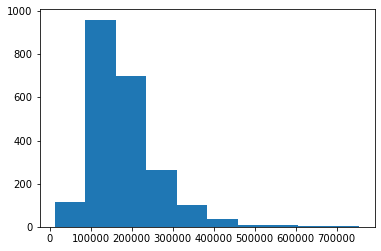

In [386]:
print('Skewness:', train['saleprice'].skew())
plt.hist(train['saleprice']);

### Continuous Variables
---

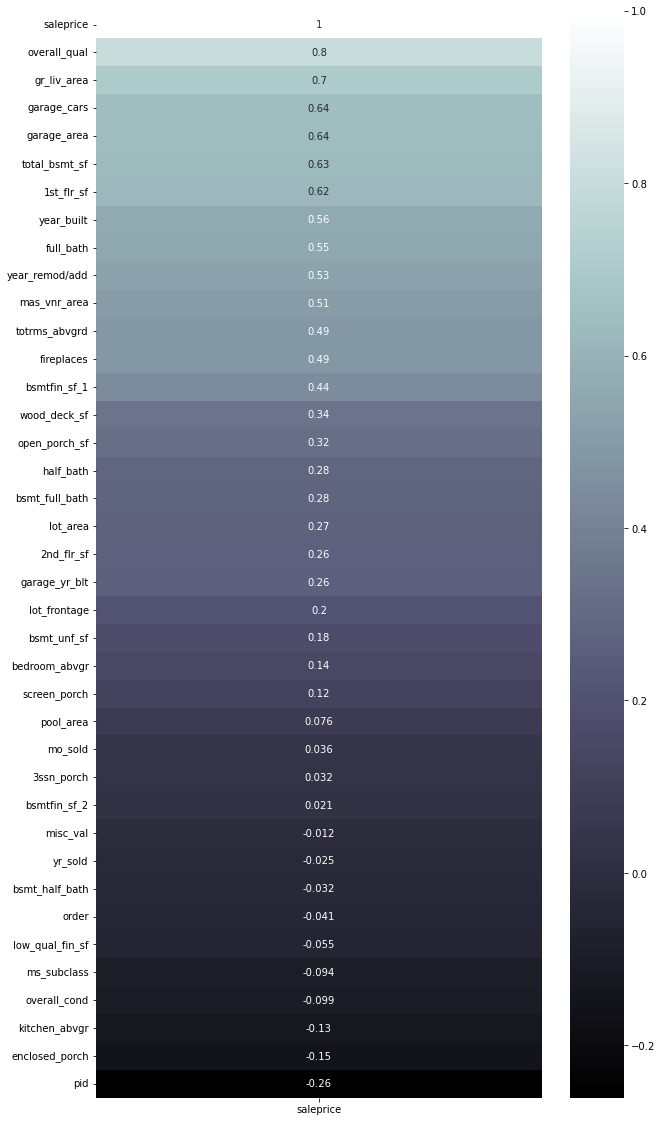

In [383]:
# Check correlation with saleprice
plt.figure(figsize=(10,20))
sns.heatmap(train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)
            , cmap='bone', annot=True);

In [387]:
# Get top correlated features.
features_top10 = train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).index[1:11]
features_top15 = train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).index[1:16]
features_top20 = train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).index[1:21]

In [ ]:
# Note for continuous variables.
## 1. garage_yr_blt : has some missing data that turned to zero
### 

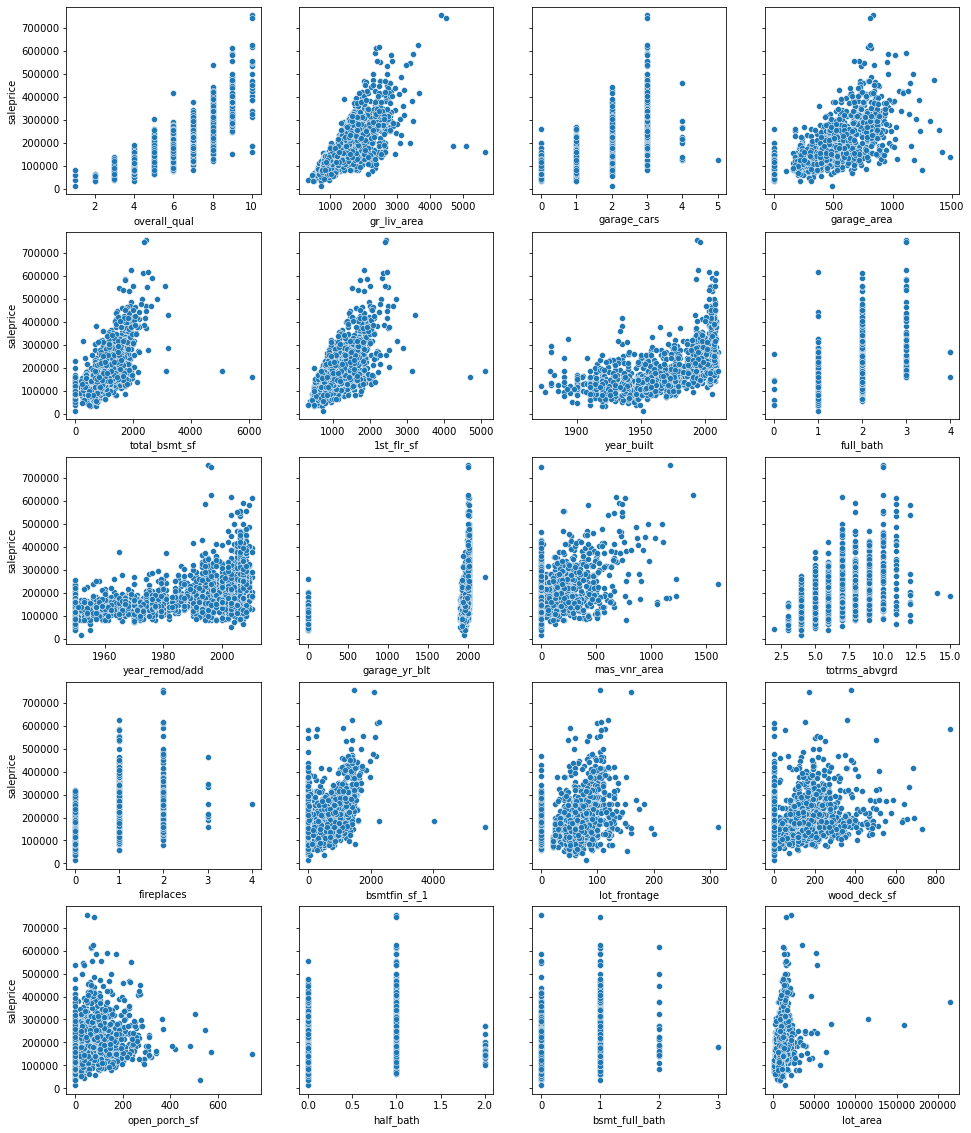

In [287]:
# Plot top 20 related features against saleprice.

fig, axes = plt.subplots(5, 4, figsize=(16,20))

for i, feat in enumerate(features_top20): ## iterate column name
    x = i // 4
    y = i % 4
    pl = sns.scatterplot(
        ax=axes[x,y],
        x=feat,
        y='saleprice',
        data=train)
    if y != 0:
        pl.set(ylabel=None, yticklabels=[])  ## show label only the leftmost plot 

In [418]:
# Find correlation of top 15 features.
train[features_top15].corr()

,overall_qual,gr_liv_area,garage_cars,garage_area,total_bsmt_sf,1st_flr_sf,year_built,full_bath,year_remod/add,mas_vnr_area,totrms_abvgrd,fireplaces,bsmtfin_sf_1,wood_deck_sf,open_porch_sf
overall_qual,1.000000,0.565505,0.610479,0.577782,0.564123,0.491761,0.610770,0.527452,0.576069,0.430016,0.374400,0.399552,0.314075,0.270004,0.318247
gr_liv_area,0.565505,1.000000,0.486897,0.490863,0.464726,0.570651,0.242299,0.630072,0.312182,0.407101,0.804690,0.453308,0.237315,0.266565,0.354059
garage_cars,0.610479,0.486897,1.000000,0.889199,0.441815,0.452059,0.548626,0.483017,0.424133,0.358127,0.356624,0.321456,0.251801,0.248614,0.218276
garage_area,0.577782,0.490863,0.889199,1.000000,0.493069,0.505347,0.490815,0.418783,0.381072,0.378342,0.330792,0.293437,0.303041,0.250268,0.248716
total_bsmt_sf,0.564123,0.464726,0.441815,0.493069,1.000000,0.811268,0.408993,0.329825,0.300478,0.393363,0.295479,0.350731,0.549934,0.250035,0.269004
1st_flr_sf,0.491761,0.570651,0.452059,0.505347,0.811268,1.000000,0.316157,0.375397,0.249663,0.402518,0.397437,0.413544,0.475298,0.254173,0.253017
year_built,0.610770,0.242299,0.548626,0.490815,0.408993,0.316157,1.000000,0.468460,0.612128,0.297977,0.119102,0.183310,0.279391,0.237699,0.198121
full_bath,0.527452,0.630072,0.483017,0.418783,0.329825,0.375397,0.468460,1.000000,0.455258,0.248590,0.535858,0.246559,0.088061,0.197144,0.246435
year_remod/add,0.576069,0.312182,0.424133,0.381072,0.300478,0.249663,0.612128,0.455258,1.000000,0.190186,0.194302,0.150784,0.163533,0.223719,0.245626
mas_vnr_area,0.430016,0.407101,0.358127,0.378342,0.393363,0.402518,0.297977,0.248590,0.190186,1.000000,0.279642,0.285174,0.301656,0.183650,0.143244


### Discrete Variables
---

In [240]:
# Check object variables.
train.dtypes[train.dtypes == 'object']

ms_zoning         object
street            object
alley             object
lot_shape         object
land_contour      object
utilities         object
lot_config        object
land_slope        object
neighborhood      object
condition_1       object
condition_2       object
bldg_type         object
house_style       object
roof_style        object
roof_matl         object
exterior_1st      object
exterior_2nd      object
mas_vnr_type      object
exter_qual        object
exter_cond        object
foundation        object
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating           object
heating_qc        object
central_air       object
electrical        object
kitchen_qual      object
functional        object
fireplace_qu      object
garage_type       object
garage_finish     object
garage_qual       object
garage_cond       object
paved_drive       object
pool_qc           object
fence             object


In [139]:
len(train.dtypes[train.dtypes == 'object'])

43

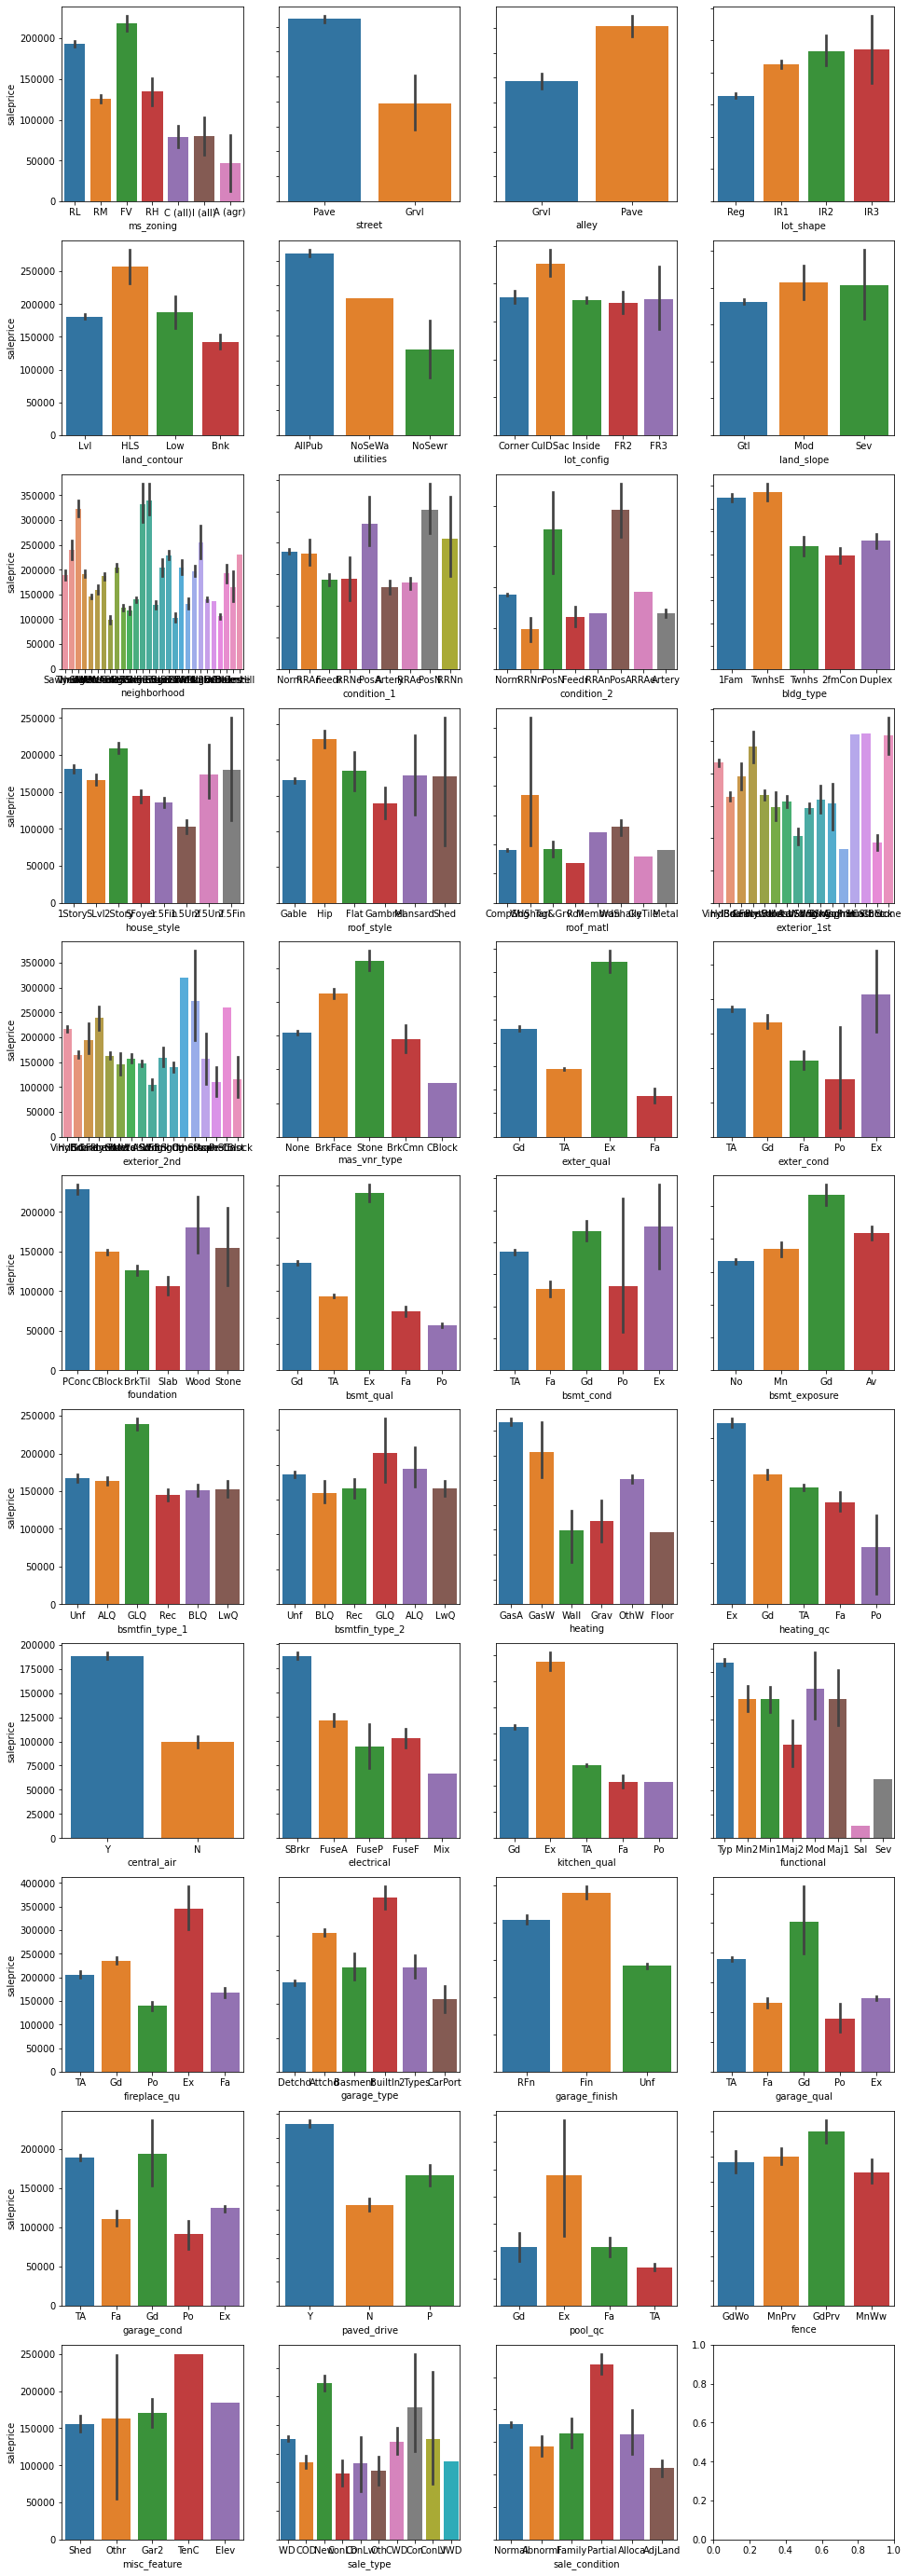

In [162]:
# Plot dummies vs Sale Price
fig, axes = plt.subplots(11, 4, figsize=(16,50))

for i, feat in enumerate(train.dtypes[train.dtypes == 'object'].index): ## iterate column name
    x = i // 4
    y = i % 4
    pl = sns.barplot(
        ax=axes[x,y],
        x=feat,
        y='saleprice',
        data=train)
    if y != 0:
        pl.set(ylabel=None, yticklabels=[])  ## show label only the leftmost plot 

In [227]:
train['foundation'].value_counts()

PConc     1001
CBlock     916
BrkTil     226
Slab        40
Stone        9
Wood         5
Name: foundation, dtype: int64

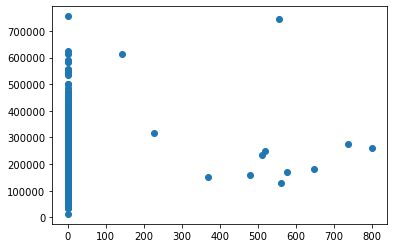

In [98]:
# Plot pool area vs. saleprice.

plt.scatter(train['pool_area'], train['saleprice'])

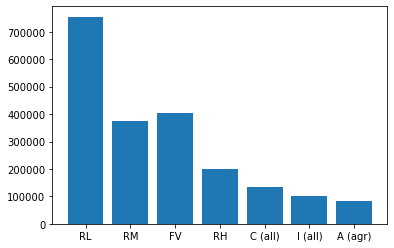

In [236]:
# MS Zoning vs. Sale Price
plt.bar(train['ms_zoning'], train['saleprice']);

In [237]:
train['ms_zoning'].value_counts()

RL         1704
RM          340
FV          113
C (all)      19
RH           17
I (all)       2
A (agr)       2
Name: ms_zoning, dtype: int64

# Features Engineering

In [485]:
# Innitiate dummy DataFrame
dummy_df = pd.DataFrame()

# Add saleprice variable to dummy
dummy_df['saleprice'] = train['saleprice']

In [486]:
# Dummy pool_area

dummy_df['pool_dummy'] = train['pool_area'].map(lambda x : 0 if x == 0 else 1) 

In [487]:
dummy_df.groupby('pool_dummy')['saleprice'].mean()

pool_dummy
0    181781.222883
1    290830.833333
Name: saleprice, dtype: float64

In [488]:
# Dummy zoning RL
dummy_df['ms_zoning_rl'] = train['ms_zoning'] == 'RL' 

In [489]:
dummy_df.groupby('ms_zoning_rl')['saleprice'].mean()

ms_zoning_rl
False    144949.369168
True     193205.342136
Name: saleprice, dtype: float64

In [490]:
# Dummy zoning RL_FV
dummy_df['ms_zoning_rlfv'] = train['ms_zoning'].apply(lambda x : 1 if x in ['RL','FV'] else 0) 

In [491]:
dummy_df['ms_zoning_rlfv'].value_counts()

1    1817
0     380
Name: ms_zoning_rlfv, dtype: int64

In [492]:
dummy_df.groupby('ms_zoning_rlfv')['saleprice'].mean()

ms_zoning_rlfv
0    123186.128947
1    194755.758393
Name: saleprice, dtype: float64

### Polinomaial

#### Polynomial Model 1 : Top 20 correlated features
---

In [353]:
# Create X, y
X_top20 = train[features_top20]
y_top20 = train['saleprice']

# Instantiate Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transfrom X data
X_top20_poly = poly.fit_transform(X_top20)

In [375]:
# Create data frame from polynomial features.
X_top20_poly_dataframe = pd.DataFrame(X_top20_poly, columns=poly.get_feature_names_out(X_top20.columns))

In [355]:
# Compare shape before and after polynomial transformation
print(X_top20.shape)
print(X_top20_poly.shape)

(2197, 20)
(2197, 230)


In [356]:
# Get poly features name
poly.get_feature_names_out(X_top20.columns)

array(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add', 'garage_yr_blt', 'mas_vnr_area', 'totrms_abvgrd',
       'fireplaces', 'bsmtfin_sf_1', 'lot_frontage', 'wood_deck_sf',
       'open_porch_sf', 'half_bath', 'bsmt_full_bath', 'lot_area',
       'overall_qual^2', 'overall_qual gr_liv_area',
       'overall_qual garage_cars', 'overall_qual garage_area',
       'overall_qual total_bsmt_sf', 'overall_qual 1st_flr_sf',
       'overall_qual year_built', 'overall_qual full_bath',
       'overall_qual year_remod/add', 'overall_qual garage_yr_blt',
       'overall_qual mas_vnr_area', 'overall_qual totrms_abvgrd',
       'overall_qual fireplaces', 'overall_qual bsmtfin_sf_1',
       'overall_qual lot_frontage', 'overall_qual wood_deck_sf',
       'overall_qual open_porch_sf', 'overall_qual half_bath',
       'overall_qual bsmt_full_bath', 'overall_qual lot_area',
       'gr_liv_area^2', 'gr_

In [357]:
# Split train/test dataset
X_top20_poly_train, X_top20_poly_test, y_top20_train, y_top20_test = \
    train_test_split(X_top20_poly, y_top20, test_size=0.25, random_state=42)

In [358]:
# Check train test split size
X_top20_poly_train.shape, X_top20_poly_test.shape

((1647, 230), (550, 230))

In [359]:
# Scale X data (Standardize to Z scores)

# Initiate
sc = StandardScaler()

# Fit and transform X to Z scores
Z_train = sc.fit_transform(X_top20_poly_train)
Z_test = sc.transform(X_top20_poly_test)

In [360]:
# Apply LASSO Regresion

## Brute-foce to find the best alpha for LASSO regression
# Set up a list of Lasso alphas to check
l_alphas = np.logspace(-3, 0, 100)

# Cross-validation over list of Lasso alphas
lasso_cv = LassoCV(alphas=l_alphas)

# Fit model using best ridge alpha
lasso_cv.fit(Z_train, y_top20_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275866396307.0917, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272975364723.2479, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270404053557.4269, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Co

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265895513604.07416, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266045918570.73914, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266216173382.01764, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633:

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267465182173.0457, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267471454782.1677, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267474495007.02118, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266950192373.34912, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266921715799.139, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266893116160.79034, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257515399380.13766, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257598008160.7753, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257730234176.68445, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257502992075.72952, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257491503709.39154, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257473487972.69122, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633:

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256291038662.9251, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256241392395.58917, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256192063432.74237, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259834401029.03723, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255970763269.38132, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254073647552.3351, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252567296448.2455, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252771328006.23532, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252959558455.87738, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254836659936.7254, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254859190860.9983, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254877365147.9055, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Co

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254544420239.68747, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254517676186.875, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254490956845.11383, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225826496631.5461, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226328018953.68146, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226599583037.99426, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230886965575.83603, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230931513175.14813, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230969147693.0531, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230973451245.87115, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230955560237.9322, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230937035882.5079, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270022758428.17804, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261051982815.08783, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257189208786.82977, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633:

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257073433519.30267, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257206767161.7049, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257326595646.91736, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258173775038.70273, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258164611936.97614, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258154048167.6419, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257648675440.90927, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257622846127.63647, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257596828002.2654, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [361]:
# Show the optimal value of alpha
lasso_cv.alpha_

0.001

In [362]:
# Evaluate model.

# R^2
print(f"Training Score: {lasso_cv.score(Z_train, y_top20_train)}")
print(f"Test Score: {lasso_cv.score(Z_test, y_top20_test)}")

# RMSE
y_preds_top20_train = lasso_cv.predict(Z_train)
y_preds_top20_test = lasso_cv.predict(Z_test)

print(f"Training RMSE: {metrics.mean_squared_error(y_top20_train, y_preds_top20_train, squared=False)}")
print(f"Test RMSE: {metrics.mean_squared_error(y_top20_test, y_preds_top20_test, squared=False)}")


Training Score: 0.9348960244362571
Test Score: 0.834803168515265
Training RMSE: 21207.686184199047
Test RMSE: 30459.968409423742


In [363]:
# Find the survival features.

# Generate coefficient
lasso_coefs = lasso_cv.coef_

# Add name to coef.
lasso_coefs = pd.Series(lasso_coefs, poly.get_feature_names_out(X_top20.columns))

# Print survival features with coef.
print('Survival features:',len(lasso_coefs[lasso_coefs != 0].sort_values(ascending=False)))
lasso_coefs[lasso_coefs != 0].sort_values(ascending=False)

Survival features: 230


overall_qual                  62118.585473
overall_qual total_bsmt_sf    35560.280445
overall_qual gr_liv_area      34752.641266
gr_liv_area                   34077.086144
overall_qual 1st_flr_sf       32349.643943
                                  ...     
gr_liv_area 1st_flr_sf       -22950.352061
garage_area year_remod/add   -23178.739694
gr_liv_area totrms_abvgrd    -34986.488510
gr_liv_area year_remod/add   -38645.272077
overall_qual year_built      -95015.140066
Length: 230, dtype: float64

#### Polynomial Model 2 : Top 15 correlated features
---

In [388]:
# Create X, y
X = train[features_top15]
y = train['saleprice']

# Instantiate Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transfrom X data
X_poly = poly.fit_transform(X)

In [389]:
# Create data frame from polynomial features.
X_top15_poly_dataframe = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

In [390]:
# Compare shape before and after polynomial transformation
print(X.shape)
print(X_poly.shape)

(2197, 15)
(2197, 135)


In [391]:
# Get poly features name
poly.get_feature_names_out(X.columns)

array(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add', 'mas_vnr_area', 'totrms_abvgrd', 'fireplaces',
       'bsmtfin_sf_1', 'wood_deck_sf', 'open_porch_sf', 'overall_qual^2',
       'overall_qual gr_liv_area', 'overall_qual garage_cars',
       'overall_qual garage_area', 'overall_qual total_bsmt_sf',
       'overall_qual 1st_flr_sf', 'overall_qual year_built',
       'overall_qual full_bath', 'overall_qual year_remod/add',
       'overall_qual mas_vnr_area', 'overall_qual totrms_abvgrd',
       'overall_qual fireplaces', 'overall_qual bsmtfin_sf_1',
       'overall_qual wood_deck_sf', 'overall_qual open_porch_sf',
       'gr_liv_area^2', 'gr_liv_area garage_cars',
       'gr_liv_area garage_area', 'gr_liv_area total_bsmt_sf',
       'gr_liv_area 1st_flr_sf', 'gr_liv_area year_built',
       'gr_liv_area full_bath', 'gr_liv_area year_remod/add',
       'gr_liv_area mas_vnr_area', 'gr

In [392]:
# Split train/test dataset
X_poly_train, X_poly_test, y_train, y_test = \
    train_test_split(X_poly, y, test_size=0.25, random_state=42)

In [393]:
# Check train test split size
X_poly_train.shape, X_poly_test.shape

((1647, 135), (550, 135))

In [394]:
# Scale X data (Standardize to Z scores)

# Initiate
sc = StandardScaler()

# Fit and transform X to Z scores
Z_train = sc.fit_transform(X_poly_train)
Z_test = sc.transform(X_poly_test)

In [395]:
# Apply LASSO Regresion

## Brute-foce to find the best alpha for LASSO regression
# Set up a list of Lasso alphas to check
l_alphas = np.logspace(-3, 0, 100)

# Cross-validation over list of Lasso alphas
lasso_cv = LassoCV(alphas=l_alphas)

# Fit model using best ridge alpha
lasso_cv.fit(Z_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355965450112.57574, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348540918878.42566, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340578370300.8733, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 344866519615.799, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345127227800.9853, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345371039756.9336, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Con

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348121438381.8395, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348129080841.6156, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348133932351.32654, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347545448454.118, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347514143999.48364, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347482885538.8556, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Co

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326417069637.56445, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326577530189.6099, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326734956756.7727, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329569763343.4884, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329570853651.81525, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329569773324.25946, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328997264712.40497, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328971068580.75616, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328944715072.6682, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308934522959.8342, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309087025416.73596, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309312825845.6881, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313588866421.03754, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313615453661.604, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313637787962.03955, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313255283103.8095, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313228136254.96625, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313200757664.8934, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295848330637.1216, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296152397189.78784, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296441104033.4613, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300432615832.9105, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300505798870.1405, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300571535943.0324, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Co

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300799395463.3136, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300780585617.4482, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300761163691.25195, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323498539193.0309, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323762987353.29663, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324024998590.7364, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331635383008.0773, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331754266974.50916, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331865107325.913, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Co

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332941373212.63416, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332930500130.18665, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332921101689.336, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [396]:
# Show the optimal value of alpha
lasso_cv.alpha_

0.5336699231206312

In [397]:
# Evaluate model.

# R^2
print(f"Training Score: {lasso_cv.score(Z_train, y_train)}")
print(f"Test Score: {lasso_cv.score(Z_test, y_test)}")

# RMSE
y_preds_train = lasso_cv.predict(Z_train)
y_preds_test = lasso_cv.predict(Z_test)

print(f"Training RMSE: {metrics.mean_squared_error(y_train, y_preds_train, squared=False)}")
print(f"Test RMSE: {metrics.mean_squared_error(y_test, y_preds_test, squared=False)}")


Training Score: 0.9204483746865882
Test Score: 0.8272048572345692
Training RMSE: 23443.047213367106
Test RMSE: 31152.604189395315


In [398]:
# Find the survival features.

# Generate coefficient
lasso_coefs = lasso_cv.coef_

# Add name to coef.
lasso_coefs = pd.Series(lasso_coefs, poly.get_feature_names_out(X.columns))

# Print survival features with coef.
print('Survival features:',len(lasso_coefs[lasso_coefs != 0].sort_values(ascending=False)))
lasso_coefs[lasso_coefs != 0].sort_values(ascending=False)

Survival features: 135


overall_qual                  68216.530393
overall_qual gr_liv_area      59060.108059
year_built open_porch_sf      39975.327863
overall_qual garage_area      36317.897376
overall_qual 1st_flr_sf       35928.914253
                                  ...     
year_built fireplaces        -28499.132291
gr_liv_area totrms_abvgrd    -29429.333496
gr_liv_area garage_area      -37407.539195
gr_liv_area year_remod/add   -39418.041738
overall_qual year_built      -98077.115414
Length: 135, dtype: float64

#### Polynomial Model 3 : Top 10 correlated features
---

In [377]:
# Create X, y
X = train[features_top10]
y = train['saleprice']

# Instantiate Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transfrom X data
X_poly = poly.fit_transform(X)

In [378]:
# Create data frame from polynomial features.
X_top10_poly_dataframe = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

In [320]:
# Compare shape before and after polynomial transformation
print(X.shape)
print(X_poly.shape)

(2197, 10)
(2197, 65)


In [321]:
# Get poly features name
poly.get_feature_names_out(X.columns)

array(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add', 'garage_yr_blt', 'overall_qual^2',
       'overall_qual gr_liv_area', 'overall_qual garage_cars',
       'overall_qual garage_area', 'overall_qual total_bsmt_sf',
       'overall_qual 1st_flr_sf', 'overall_qual year_built',
       'overall_qual full_bath', 'overall_qual year_remod/add',
       'overall_qual garage_yr_blt', 'gr_liv_area^2',
       'gr_liv_area garage_cars', 'gr_liv_area garage_area',
       'gr_liv_area total_bsmt_sf', 'gr_liv_area 1st_flr_sf',
       'gr_liv_area year_built', 'gr_liv_area full_bath',
       'gr_liv_area year_remod/add', 'gr_liv_area garage_yr_blt',
       'garage_cars^2', 'garage_cars garage_area',
       'garage_cars total_bsmt_sf', 'garage_cars 1st_flr_sf',
       'garage_cars year_built', 'garage_cars full_bath',
       'garage_cars year_remod/add', 'garage_cars garage_yr_blt',
       'garage_a

In [328]:
# Split train/test dataset
X_poly_train, X_poly_test, y_train, y_test = \
    train_test_split(X_poly, y, test_size=0.25, random_state=42)

In [329]:
# Check train test split size
X_poly_train.shape, X_poly_test.shape

((1647, 65), (550, 65))

In [330]:
# Scale X data (Standardize to Z scores)

# Initiate
sc = StandardScaler()

# Fit and transform X to Z scores
Z_train = sc.fit_transform(X_poly_train)
Z_test = sc.transform(X_poly_test)

In [331]:
# Apply LASSO Regresion

## Brute-foce to find the best alpha for LASSO regression
# Set up a list of Lasso alphas to check
l_alphas = np.logspace(-3, 0, 100)

# Cross-validation over list of Lasso alphas
lasso_cv = LassoCV(alphas=l_alphas)

# Fit model using best ridge alpha
lasso_cv.fit(Z_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469520215507.3352, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 442192464373.07104, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 441209380816.5527, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463785729572.791, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464106063221.3769, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464401873535.2696, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Con

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466887704049.43823, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466852659032.0168, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466815804432.1241, tolerance: 923844923.0921168
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 436311727826.0707, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 436753388336.6201, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437121808276.2196, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Co

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451418377663.0022, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451723819044.69934, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452010579729.6698, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455618782159.59656, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455611293900.702, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455602001026.6459, tolerance: 880686371.1139883
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Co

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419904943712.1145, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420745520769.2074, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421829513530.79443, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433889049428.3107, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434015355113.85144, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434129423796.01025, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434681817468.2348, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434655603206.90515, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434627916531.10724, tolerance: 918288682.3897121
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395237461997.5371, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395671391332.004, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 396930581441.54785, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Co

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412556340220.8855, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412790885006.6307, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413010728429.98425, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415418348793.11725, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415438487430.904, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415455864530.546, tolerance: 915942576.1294777
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Con

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446063810298.55804, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447128481741.9612, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449180448892.32745, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472118285886.5518, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472400488462.05115, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472661012102.30054, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475128297138.709, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475129490902.7687, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475128095510.03754, tolerance: 912374622.2718469
  model = cd_fast.enet_coordinate_descent_gram(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Co

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [332]:
# Show the optimal value of alpha
lasso_cv.alpha_

0.001

In [333]:
# Evaluate model.

# R^2
print(f"Training Score: {lasso_cv.score(Z_train, y_train)}")
print(f"Test Score: {lasso_cv.score(Z_test, y_test)}")

# RMSE
y_preds_train = lasso_cv.predict(Z_train)
y_preds_test = lasso_cv.predict(Z_test)

print(f"Training RMSE: {metrics.mean_squared_error(y_train, y_preds_train, squared=False)}")
print(f"Test RMSE: {metrics.mean_squared_error(y_test, y_preds_test, squared=False)}")


Training Score: 0.8947377621277806
Test Score: 0.7703620648049112
Training RMSE: 26966.577637324994
Test RMSE: 35912.894408196626


In [ ]:
# Summarise:
## Model top 20 correlated to saleprice has better RMSE 

# Make model
---

In [78]:
# create function to return model metrics

def r2_adj(model, X, y):
    return 1 - (1-model.score(X, y)) * (len(y) - 1 ) / (len(y) - X.shape[1] - 1)

def reg_metrics(X, y):
    """Print model metrics and return regression model
    from given X, y"""
    # Split data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Create metrics - train
    y_train_preds = model.predict(X_train)
    train_mae = metrics.mean_absolute_error(y_train, y_train_preds)
    train_rmse = metrics.mean_squared_error(y_train, y_train_preds, squared=False)
    train_r2 = metrics.r2_score(y_train, y_train_preds)
    train_adj_r2 = r2_adj(model, X_train, y_train)
    
    # Create metrics - test
    y_test_preds = model.predict(X_test)
    test_mae = metrics.mean_absolute_error(y_test, y_test_preds)
    test_rmse = metrics.mean_squared_error(y_test, y_test_preds, squared=False)
    test_r2 = metrics.r2_score(y_test, y_test_preds)
    test_adj_r2 = r2_adj(model, X_test, y_test)
    
    print(f"""-----------Train Data-----------
MAE: {train_mae}
RMSE: {train_rmse}
R2: {train_r2}
Adj_R2: {train_adj_r2}
Cross Validation: {cross_val_score(model, X_train, y_train)}
Cross Validation Mean: {cross_val_score(model, X_train, y_train).mean()}
--------------------------------""")
    print(f"""-----------Test Data-----------
MAE: {test_mae}
RMSE: {test_rmse}
R2: {test_r2}
Adj_R2: {test_adj_r2}
--------------------------------""")
    return model

In [64]:
features_top10 = train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).head(11).index.drop('saleprice')

In [71]:
features_top10

Index(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add', 'garage_yr_blt'],
      dtype='object')

In [74]:
train[features_top10].isnull().sum()

overall_qual      0
gr_liv_area       0
garage_cars       0
garage_area       0
total_bsmt_sf     0
1st_flr_sf        0
year_built        0
full_bath         0
year_remod/add    0
garage_yr_blt     0
dtype: int64

In [73]:
train[features_top10] = train[features_top10].fillna(0)

In [74]:
train[features_top10].isnull().sum()

overall_qual      0
gr_liv_area       0
garage_cars       0
garage_area       0
total_bsmt_sf     0
1st_flr_sf        0
year_built        0
full_bath         0
year_remod/add    0
garage_yr_blt     0
dtype: int64

In [82]:
# Model 1 : Baseline model
## Top 10 correlated variables

X = train[features_top10]
y = train['saleprice']
model = reg_metrics(X, y)

-----------Train Data-----------
MAE: 24457.235385908538
RMSE: 38199.49676709929
R2: 0.7887794272296293
Adj_R2: 0.7874883479339669
Cross Validation: [0.81612747 0.72878103 0.82525181 0.6947599  0.84183042]
Cross Validation Mean: 0.7813501251869543
--------------------------------
-----------Test Data-----------
MAE: 24177.117652098535
RMSE: 36315.45199212545
R2: 0.7651850607979889
Adj_R2: 0.7608285684194729
--------------------------------


In [92]:
# Model 2 : Droped car
feature = ['overall_qual', 'gr_liv_area', 'garage_area',
 'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
 'year_remod/add', 'garage_yr_blt']

X = train[feature]
y = train['saleprice']
reg_metrics(X, y)

-----------Train Data-----------
MAE: 24269.444150175914
RMSE: 38342.276199951906
R2: 0.7871975050945772
Adj_R2: 0.786027546356551
Cross Validation: [0.81764044 0.72480967 0.8274339  0.69217914 0.84332363]
Cross Validation Mean: 0.7810773547410309
--------------------------------
-----------Test Data-----------
MAE: 24105.531421735144
RMSE: 36328.00590645286
R2: 0.7650226860517363
Adj_R2: 0.7611063974859319
--------------------------------


LinearRegression()

In [188]:
# Model 3 : Add central_air
## RMSE slightly decreases 
feature = ['overall_qual', 'gr_liv_area', 'garage_area',
 'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
 'year_remod/add', 'garage_yr_blt', 'pool_dummy', 'ms_zoning',
 'central_air', 'ms_zoning_rlfv', 'exter_qual']

X = train[feature]
X = pd.get_dummies(X, drop_first=True)
y = train['saleprice']
model = reg_metrics(X, y)

-----------Train Data-----------
MAE: 22718.6747753291
RMSE: 36565.2263570763
R2: 0.8064659142417403
Adj_R2: 0.8039648583642489
Cross Validation: [0.83498688 0.72995083 0.83789662 0.71328136 0.86845343]
Cross Validation Mean: 0.7969138217338495
--------------------------------
-----------Test Data-----------
MAE: 22018.279667740477
RMSE: 33819.13621053954
R2: 0.7963577729794011
Adj_R2: 0.7882583662229
--------------------------------


In [212]:
train[features_top15] = train[features_top15].fillna(0)

In [405]:
features_top15 = train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).head(16).index.drop('saleprice')

In [505]:
# Model 4 : Add more dummy
## RMSE slightly decreases 
feature = features_top15.to_list()
dummy = ["bldg_type","lot_shape","land_contour","exter_qual"]
feature = feature + dummy

X = train[feature]
X = pd.get_dummies(X, drop_first=True)
y = train['saleprice']
model = reg_metrics(X, y)

-----------Train Data-----------
MAE: 20445.785134978254
RMSE: 33507.7904792446
R2: 0.8374778664285248
Adj_R2: 0.834665369679451
Cross Validation: [0.84404069 0.74447795 0.87513318 0.7353125  0.89130924]
Cross Validation Mean: 0.8180547118247976
--------------------------------
-----------Test Data-----------
MAE: 20011.92083106604
RMSE: 31885.62438889108
R2: 0.8189774544542276
Adj_R2: 0.8092487955765277
--------------------------------


In [447]:
X_poly_corr5 = X_top20_poly_dataframe.merge(train['saleprice'], left_index=True, right_index=True)[poly_corr[:5].index]

In [441]:
poly_corr = X_top20_poly_dataframe.merge(train['saleprice'], left_index=True, right_index=True).corr()['saleprice']\
.sort_values(ascending=False)[1:30]
poly_corr

overall_qual gr_liv_area       0.839083
overall_qual^2                 0.826333
overall_qual garage_cars       0.813066
overall_qual year_built        0.805555
overall_qual year_remod/add    0.803858
overall_qual garage_area       0.801385
overall_qual                   0.799928
gr_liv_area garage_cars        0.794061
overall_qual 1st_flr_sf        0.792243
overall_qual totrms_abvgrd     0.789949
overall_qual total_bsmt_sf     0.769897
overall_qual full_bath         0.764335
garage_cars total_bsmt_sf      0.763700
garage_cars 1st_flr_sf         0.756537
gr_liv_area garage_area        0.750086
garage_area full_bath          0.727989
total_bsmt_sf full_bath        0.719325
gr_liv_area year_built         0.719020
garage_cars full_bath          0.716515
garage_cars totrms_abvgrd      0.714137
gr_liv_area year_remod/add     0.709895
overall_qual garage_yr_blt     0.707659
garage_area totrms_abvgrd      0.704964
gr_liv_area garage_yr_blt      0.700809
gr_liv_area                    0.699675


In [506]:
# Change overall qual to ^2
X['overall_qual'] = X['overall_qual'] ** 2
model = reg_metrics(X, y)

-----------Train Data-----------
MAE: 19949.76516189526
RMSE: 32781.68115434307
R2: 0.8444452144505233
Adj_R2: 0.8417532898551059
Cross Validation: [0.8542981  0.75498968 0.87640703 0.74144529 0.89828964]
Cross Validation Mean: 0.8250859486937122
--------------------------------
-----------Test Data-----------
MAE: 19608.204695448137
RMSE: 31575.736283474507
R2: 0.8224789784137719
Adj_R2: 0.81293850124599
--------------------------------


In [507]:
# Change garage car to ^2
X['garage_car'] = X['garage_cars'] ** 2
model = reg_metrics(X, y)

-----------Train Data-----------
MAE: 19616.47448144649
RMSE: 32331.577658910595
R2: 0.848687527861862
Adj_R2: 0.8459738224246288
Cross Validation: [0.86279972 0.76187038 0.87216081 0.74640674 0.90018643]
Cross Validation Mean: 0.8286848164586871
--------------------------------
-----------Test Data-----------
MAE: 19373.571638409292
RMSE: 31449.451028679898
R2: 0.8238961081330353
Adj_R2: 0.8140749295481469
--------------------------------


In [508]:
dummy_df.head()

,saleprice,pool_dummy,ms_zoning_rl,ms_zoning_rlfv
0,159000,0,True,1
1,271900,0,True,1
2,137500,0,True,1
3,248500,0,True,1
4,167000,0,True,1


In [509]:
# Add group dummy to model
X = X.merge(dummy_df['ms_zoning_rlfv'], left_index=True, right_index=True)
model = reg_metrics(X, y)

-----------Train Data-----------
MAE: 19457.151473671394
RMSE: 32178.591119057462
R2: 0.8501161005174236
Adj_R2: 0.8473336023834649
Cross Validation: [0.86414867 0.7642844  0.87403525 0.74781695 0.90301686]
Cross Validation Mean: 0.8306604259937236
--------------------------------
-----------Test Data-----------
MAE: 19272.131743603586
RMSE: 31439.237492761065
R2: 0.8240104726959856
Adj_R2: 0.8138376676495107
--------------------------------


In [523]:
# Adjust Model 4 : Summary of all above for model 4

# Get top15 features name
feature = features_top15.to_list()

# Set dummy variables
dummy = ["bldg_type","lot_shape","land_contour","exter_qual"]

# Combine top15 and dummy
feature = feature + dummy

# Get data for X variabls
X = train[feature]

# Create dummy for X
X = pd.get_dummies(X, drop_first=True)

# Create manual ms_zoning if zoning = RL / FV -> 1, else 0
X.merge(train['ms_zoning'].apply(lambda x : 1 if x in ['RL','FV'] else 0),
       left_index=True, right_index=True)

# Transfrom overall_qual to ^2
X['overall_qual'] = X['overall_qual'] ** 2

# Transfrom garage_car to ^2
X['garage_car'] = X['garage_cars'] ** 2

# Get y
y = train['saleprice']

# Train model
model = reg_metrics(X, y)





-----------Train Data-----------
MAE: 19616.47448144649
RMSE: 32331.577658910595
R2: 0.848687527861862
Adj_R2: 0.8459738224246288
Cross Validation: [0.86279972 0.76187038 0.87216081 0.74640674 0.90018643]
Cross Validation Mean: 0.8286848164586871
--------------------------------
-----------Test Data-----------
MAE: 19373.571638409292
RMSE: 31449.451028679898
R2: 0.8238961081330353
Adj_R2: 0.8140749295481469
--------------------------------


In [229]:
# Model 5 : Add more dummy
## RMSE slightly decreases 
feature = features_top15.to_list()
dummy = ["bldg_type","lot_shape","land_contour","exter_qual", "central_air"]
feature = feature + dummy

X = train[feature]
X = pd.get_dummies(X, drop_first=True)
y = train['saleprice']
model = reg_metrics(X, y)

-----------Train Data-----------
MAE: 20329.63504309357
RMSE: 33564.66074005915
R2: 0.8369257250045343
Adj_R2: 0.8340010781431437
Cross Validation: [0.84380589 0.73591941 0.87620236 0.73257873 0.89006494]
Cross Validation Mean: 0.815714266284948
--------------------------------
-----------Test Data-----------
MAE: 19762.625119333214
RMSE: 31699.352700693446
R2: 0.8210862971501856
Adj_R2: 0.8111084175681766
--------------------------------


In [372]:
dummy = ["bldg_type","lot_shape","land_contour","exter_qual", "central_air"]
X_top20_poly_dataframe = \
X_top20_poly_dataframe.merge(train[dummy], left_index=True, right_index=True)

In [373]:
X_top20_poly_dataframe.shape

(2197, 235)

In [376]:
# Model 6 : Polynomial with dummy
## RMSE slightly decreases 


X = X_top20_poly_dataframe
# X = pd.get_dummies(X, drop_first=True)
y = train['saleprice']
model = reg_metrics(X, y)

-----------Train Data-----------
MAE: 14817.114664038167
RMSE: 20229.75550734916
R2: 0.940761752661863
Adj_R2: 0.9311397209614594
Cross Validation: [0.89503556 0.84635992 0.84340589 0.73633923 0.85978825]
Cross Validation Mean: 0.8361857673707467
--------------------------------
-----------Test Data-----------
MAE: 19343.72632762458
RMSE: 32594.37249852669
R2: 0.8108405402387793
Adj_R2: 0.6744559767745762
--------------------------------


In [400]:
dummy = ["bldg_type","lot_shape","land_contour","exter_qual", "central_air"]
X_top15_poly_dataframe = \
X_top15_poly_dataframe.merge(train[dummy], left_index=True, right_index=True)

In [401]:
# Model 7 : Polynomial with dummy
## RMSE slightly decreases 


X = X_top15_poly_dataframe
X = pd.get_dummies(X, drop_first=True)
y = train['saleprice']
model = reg_metrics(X, y)

-----------Train Data-----------
MAE: 15820.340488860702
RMSE: 21773.605695022237
R2: 0.9313751132959687
Adj_R2: 0.9245447137509448
Cross Validation: [0.90489666 0.88486555 0.86061468 0.76851442 0.8655608 ]
Cross Validation Mean: 0.8568904235531164
--------------------------------
-----------Test Data-----------
MAE: 18128.08396777366
RMSE: 31531.681212563544
R2: 0.8229739942910327
Adj_R2: 0.7570318071644424
--------------------------------


In [ ]:
# features_top15 =  features_top15.tolist()

# Evaluate model

In [ ]:
lr = Line

In [ ]:
preds = idiot_model(X)

In [ ]:
metrics.mean_squared_error(y, preds, squared=False)

# Prediction & Submission

In [81]:
## load test data
test = pd.read_csv('./data/test.csv')
test.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1,193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2,2407,528181040,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2006,New,Partial
3,46,528175010,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,New,Partial
4,2478,531379030,60,RL,70.0,8304,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdPrv,NaN,0,7,2006,WD,Normal


In [84]:
test.columns = test.columns.str.lower().str.replace(" ", "_")

## Submission 1

In [86]:
test[features_top10] = test[features_top10].fillna(0)

In [87]:
preds_test = model.predict(test[features_top10])
preds_test[:10]

array([109246.63234052, 214826.31104734, 214785.33783914, 216481.96939844,
       206261.03265978, 115335.3510711 , 256215.92635579, 165662.05809372,
       119737.9144984 , 127017.89861846])

In [88]:
## create dataframe with "Order" and prediction
pred_df = pd.DataFrame({'Order':test['order'], 'SalePrice':preds_test})
pred_df

,Order,SalePrice
0,2127,109246.632341
1,193,214826.311047
2,2407,214785.337839
3,46,216481.969398
4,2478,206261.032660
...,...,...
728,453,191596.517334
729,1352,186812.679230
730,197,120937.203855
731,2850,168698.572917


In [89]:
## save to csv file for submission
## index = False
pred_df.to_csv('submission.csv', index=False)

## Submission 2

In [ ]:
# Adjust Model 4 : Summary of all abov for model 4
feature = features_top15.to_list()
dummy = ["bldg_type","lot_shape","land_contour","exter_qual"]
feature = feature + dummy

X = train[feature]
X = pd.get_dummies(X, drop_first=True)
X.merge(train['ms_zoning'].apply(lambda x : 1 if x in ['RL','FV'] else 0),
       left_index=True, right_index=True)
X['overall_qual'] = X['overall_qual'] ** 2
X['garage_car'] = X['garage_cars'] ** 2
y = train['saleprice']
model = reg_metrics(X, y)


### Clean Data

In [86]:
test[features_top10] = test[features_top10].fillna(0)

### Predict Data

In [515]:
# Prep X for test data
X_submit = test[feature]
X_submit = pd.get_dummies(X_submit, drop_first=True)
X_submit.merge(test['ms_zoning'].apply(lambda x : 1 if x in ['RL','FV'] else 0),
       left_index=True, right_index=True)
X_submit['overall_qual'] = X_submit['overall_qual'] ** 2
X_submit['garage_car'] = X_submit['garage_cars'] ** 2

preds_test = model.predict(X_submit)
preds_test[:10]

array([124545.96430474, 185683.04300398, 189838.1830841 , 205372.17086426,
       184286.12125072, 131374.80294565, 213498.18277165, 167139.44066669,
       122571.20250086, 122509.17689088])

### Create submission table

In [517]:
## create dataframe with "Order" and prediction
pred_df = pd.DataFrame({'Order':test['order'], 'SalePrice':preds_test})
pred_df

,Order,SalePrice
0,2127,124545.964305
1,193,185683.043004
2,2407,189838.183084
3,46,205372.170864
4,2478,184286.121251
...,...,...
728,453,178459.973259
729,1352,147724.685323
730,197,141998.132437
731,2850,184205.106545


### Export submission table

In [518]:
## save to csv file for submission
## index = False
pred_df.to_csv('submission.csv', index=False)